In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [17]:
# all of this is copied from the previous notebook, '06_iris_dimensionality' 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

In [6]:
X = iris.data

In [7]:
X.shape

(150, 4)

In [9]:
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [10]:
# Principle Components Analysis - PCA
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2, whiten=True).fit(X)

In [31]:
pca_X = pca.transform(X)

In [32]:
pca_X.shape

(150, 2)

In [33]:
pca_X[:10]

array([[-1.3059028 ,  0.66358991],
       [-1.32107398, -0.34449998],
       [-1.405936  , -0.27905426],
       [-1.33617856, -0.63213207],
       [-1.32749711,  0.67845686],
       [-1.10920067,  1.51932013],
       [-1.37240118, -0.16681722],
       [-1.27781875,  0.34622394],
       [-1.40503061, -1.15972851],
       [-1.30086133, -0.21677267]])

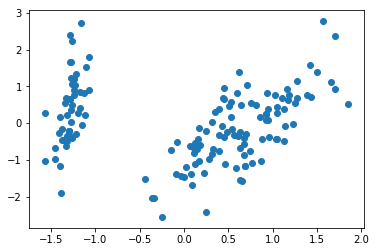

In [16]:
plt.scatter(pca_X[:, 0], pca_X[:,1])

In [18]:
from sklearn.cluster import KMeans

In [19]:
from numpy.random import RandomState

In [20]:
rng = RandomState(65)

In [53]:
kmeans = KMeans(n_clusters=3, random_state=rng)

In [49]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=<mtrand.RandomState object at 0x10c74baf0>, tol=0.0001,
    verbose=0)

In [50]:
np.round(kmeans.cluster_centers_ , decimals=2)

array([[5.01, 3.42, 1.46, 0.24],
       [5.9 , 2.75, 4.39, 1.43],
       [6.85, 3.07, 5.74, 2.07]])

In [51]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

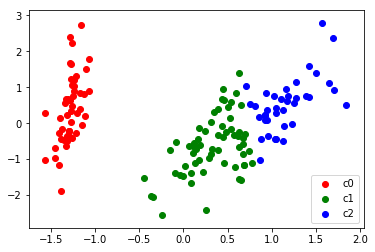

In [52]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

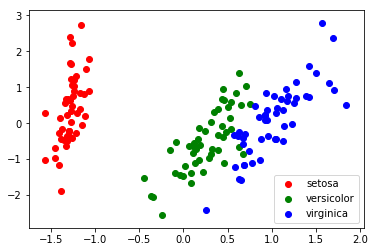

In [36]:
plot_2D(X_pca, iris.target, iris.target_names)